In [24]:
#import of libraries
import pandas as pd
import numpy as np

In [30]:
#import data
supermarket_df = pd.read_csv("Datasets/supermarket.csv", sep=';')
#check for null values
print(supermarket_df.isnull().sum())

Branch           0
Customer type    0
Gender           0
Quantity         0
Total            0
Payment          0
Income           0
Rating           0
dtype: int64


# Task 1
Your job is to build a predictive model to
estimate the purchase amount (’Total’ column) for a customer.

In [26]:
supermarket_df

,Branch,Customer type,Gender,Quantity,Total,Payment,Income,Rating
0,A,Member,Female,7,548.9715,Ewallet,26.1415,9.1
1,C,Normal,Female,5,80.2200,Cash,3.8200,9.6
2,A,Normal,Male,7,340.5255,Credit card,16.2155,7.4
3,A,Member,Male,8,489.0480,Ewallet,23.2880,8.4
4,A,Normal,Male,7,634.3785,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,C,Normal,Male,1,42.3675,Ewallet,2.0175,6.2
996,B,Normal,Female,10,1022.4900,Ewallet,48.6900,4.4
997,A,Member,Male,1,33.4320,Cash,1.5920,7.7
998,A,Normal,Male,1,69.1110,Cash,3.2910,4.1


# Task 1.1
Exploratory data analysis: try to understand the different variables in the data. As part of this
exploratory analysis, create visualizations that show the relationship between ’Total’ and the other
variables (create at least 4 plots, you are free to create more if you think it can help in understating
the problem), perform aggregation (check how average ’Total’ varies across categorical variables).

In [223]:
print(supermarket_df.head())
print(supermarket_df.describe())
print(supermarket_df.dtypes)
print(supermarket_df.isnull().sum())

  Branch Customer type  Gender  Quantity     Total      Payment   Income  \
0      A        Member  Female         7  548.9715      Ewallet  26.1415   
1      C        Normal  Female         5   80.2200         Cash   3.8200   
2      A        Normal    Male         7  340.5255  Credit card  16.2155   
3      A        Member    Male         8  489.0480      Ewallet  23.2880   
4      A        Normal    Male         7  634.3785      Ewallet  30.2085   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3     8.4  
4     5.3  
          Quantity        Total       Income      Rating
count  1000.000000  1000.000000  1000.000000  1000.00000
mean      5.510000   322.966749    15.379369     6.97270
std       2.923431   245.885335    11.708825     1.71858
min       1.000000    10.678500     0.508500     4.00000
25%       3.000000   124.422375     5.924875     5.50000
50%       5.000000   253.848000    12.088000     7.00000
75%       8.000000   471.350250    22.445250     8.50000
max      10.000

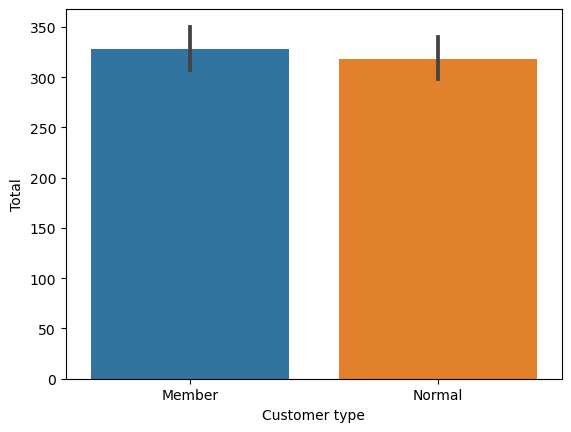

In [231]:
# see which spends more member or not member
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=supermarket_df, x="Customer type", y="Total")
plt.show()

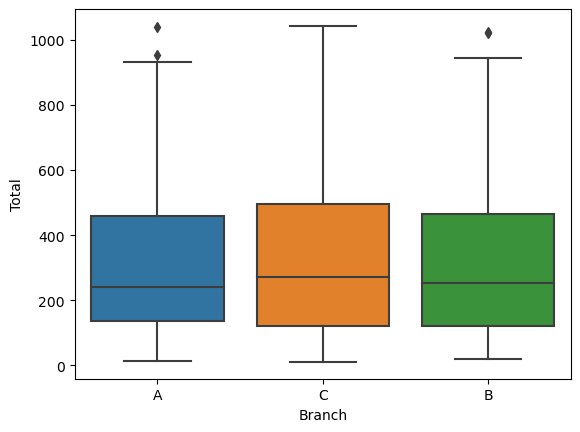

In [232]:
sns.boxplot(data=supermarket_df, x="Branch", y="Total")
plt.show()

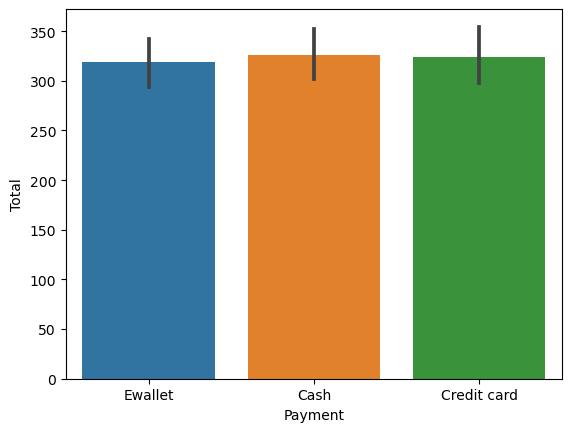

In [233]:
sns.barplot(data=supermarket_df, x="Payment", y="Total")
plt.show()

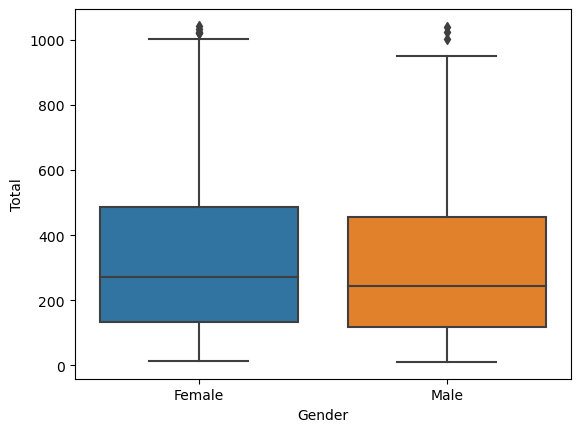

In [234]:
sns.boxplot(data=supermarket_df, x="Gender", y="Total")
plt.show()

In [238]:
avg_total_by_branch = supermarket_df.groupby("Branch")["Total"].mean()
avg_total_by_customer_type = supermarket_df.groupby("Customer type")["Total"].mean()
avg_total_by_gender = supermarket_df.groupby("Gender")["Total"].mean()
avg_total_by_payment = supermarket_df.groupby("Payment")["Total"].mean()
print("average", avg_total_by_branch)
print("average", avg_total_by_customer_type)
print("average", avg_total_by_gender)
print("average", avg_total_by_payment)

average Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64
average Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64
average Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64
average Payment
Cash           326.181890
Credit card    324.009878
Ewallet        318.820600
Name: Total, dtype: float64


In [240]:
supermarket_df

,Branch,Customer type,Gender,Quantity,Total,Payment,Income,Rating
0,A,Member,Female,7,548.9715,Ewallet,26.1415,9.1
1,C,Normal,Female,5,80.2200,Cash,3.8200,9.6
2,A,Normal,Male,7,340.5255,Credit card,16.2155,7.4
3,A,Member,Male,8,489.0480,Ewallet,23.2880,8.4
4,A,Normal,Male,7,634.3785,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,C,Normal,Male,1,42.3675,Ewallet,2.0175,6.2
996,B,Normal,Female,10,1022.4900,Ewallet,48.6900,4.4
997,A,Member,Male,1,33.4320,Cash,1.5920,7.7
998,A,Normal,Male,1,69.1110,Cash,3.2910,4.1


# Task 1.2
Divide the data into training and test set: the training set should contain datapoints from branches
A and B, and the test set from branch C. Develop a regression model using the training set that the
company can use to predict the amount of purchase for a customer. Evaluate the performance for
the test set.

In [480]:
prediction_df = supermarket_df.copy()

prediction_df["Gender_female"] = prediction_df["Gender"].apply(lambda x: 1 if x == "Female" else 0)
prediction_df["Customer_Member"] = prediction_df["Customer type"].apply(lambda x: 1 if x == "Member" else 0)
prediction_df = prediction_df.drop("Gender", axis=1)
prediction_df = prediction_df.drop("Customer type", axis=1)

prediction_df = pd.get_dummies(prediction_df, columns=["Payment"], prefix="", prefix_sep="")
prediction_df.corr()["Total"]


Quantity           0.705510
Total              1.000000
Income             1.000000
Rating            -0.036442
Gender_female      0.049451
Customer_Member    0.019670
Cash               0.009474
Credit card        0.002852
Ewallet           -0.012244
Name: Total, dtype: float64

In [481]:



train = prediction_df[prediction_df["Branch"].isin(["A", "B"])]
test = prediction_df[prediction_df["Branch"] == "C"]

# drop income as it has a 1 in correlation with total and as such we can not use it
X_train = train.drop(["Total","Branch","Income"], axis=1)
y_train = train["Total"]
X_test = test.drop(["Total","Branch","Income"], axis=1)

y_test = test["Total"]


X_train

,Quantity,Rating,Gender_female,Customer_Member,Cash,Credit card,Ewallet
0,7,9.1,1,1,0,0,1
2,7,7.4,0,0,0,1,0
3,8,8.4,0,1,0,0,1
4,7,5.3,0,0,0,0,1
6,6,5.8,1,1,0,0,1
...,...,...,...,...,...,...,...
993,10,6.6,0,0,0,0,1
996,10,4.4,1,0,0,0,1
997,1,7.7,0,1,1,0,0
998,1,4.1,0,0,1,0,0


In [482]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)




In [483]:
# model is overfitting so need to do something about it
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.02e-90
Time:                        14:04:30   Log-Likelihood:                -4409.0
No. Observations:                 672   AIC:                             8832.
Df Residuals:                     665   BIC:                             8864.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.5684     23.742     

In [484]:

X2 = sm.add_constant(X_train.drop(["Cash","Ewallet","Credit card"], axis =1))

est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.95e-92
Time:                        14:04:36   Log-Likelihood:                -4409.8
No. Observations:                 672   AIC:                             8830.
Df Residuals:                     667   BIC:                             8852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              37.2546     31.628     

# Task 1.3
By looking at the coefficients of your final model, would you say that, in general, (i) male or female
customers spend more money in the supermarket; (ii) members of the loyalty program or normal
customers spend more money?

### (i) Answer: Females

### (ii) Answer: Non members

# Task 2

In [139]:
#import data
hotel_df = pd.read_csv("Datasets/hotel.csv", sep=';')
#check for null values
print(hotel_df.isna().sum())

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [140]:
hotel_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,Room_Type 1,224,10,2,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,Room_Type 1,5,11,6,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0,Room_Type 1,1,2,28,0,0,0,60.00,0,Canceled
3,2,0,0,2,0,Room_Type 1,211,5,20,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,Room_Type 1,48,4,11,0,0,0,94.50,0,Canceled


In [141]:
# check for categorical data 
print(hotel_df["booking_status"].unique())
print(hotel_df["room_type_reserved"].unique())
print(hotel_df["repeated_guest"].unique())

['Not_Canceled' 'Canceled']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
[0 1]


# Task 2.1 
Perform one-hot encoding on the categorical columns if any

In [142]:
# one-hot encode the categorical columns
room_type_encoded = pd.get_dummies(hotel_df["room_type_reserved"], prefix="room_type")
booking_status_encoded = pd.get_dummies(hotel_df["booking_status"], prefix="booking_status")
repeated_guest_encoded = pd.get_dummies(hotel_df["repeated_guest"], prefix="repeated_guest")
# concatenate the columns
hotel_df = pd.concat([hotel_df, room_type_encoded], axis=1)
hotel_df = pd.concat([hotel_df, booking_status_encoded], axis=1)
hotel_df = pd.concat([hotel_df, repeated_guest_encoded], axis=1)
# drop the original
hotel_df.drop("room_type_reserved", axis=1, inplace=True)
hotel_df.drop("booking_status", axis=1, inplace=True)
hotel_df.drop("repeated_guest", axis=1, inplace=True)
print(hotel_df.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_month', 'arrival_date', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'room_type_Room_Type 1',
       'room_type_Room_Type 2', 'room_type_Room_Type 3',
       'room_type_Room_Type 4', 'room_type_Room_Type 5',
       'room_type_Room_Type 6', 'room_type_Room_Type 7',
       'booking_status_Canceled', 'booking_status_Not_Canceled',
       'repeated_guest_0', 'repeated_guest_1'],
      dtype='object')


In [120]:
hotel_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_Room_Type 2,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,booking_status_Canceled,booking_status_Not_Canceled,repeated_guest_0,repeated_guest_1
0,2,0,1,2,0,224,10,2,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2,0,2,3,0,5,11,6,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,2,1,0,1,2,28,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,0,0,2,0,211,5,20,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,0,1,1,0,48,4,11,0,0,...,0,0,0,0,0,0,1,0,1,0


# Task 2.2
Check the histograms of the columns lead time, and no of previous bookings not canceled. If you
think there are outliers in the data, remove them.

59
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64


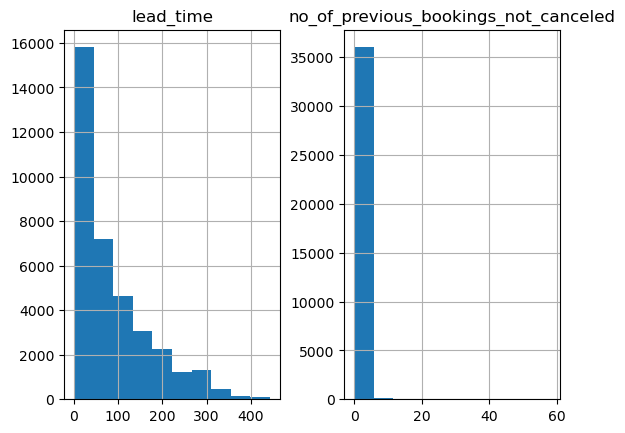

<AxesSubplot:ylabel='lead_time'>

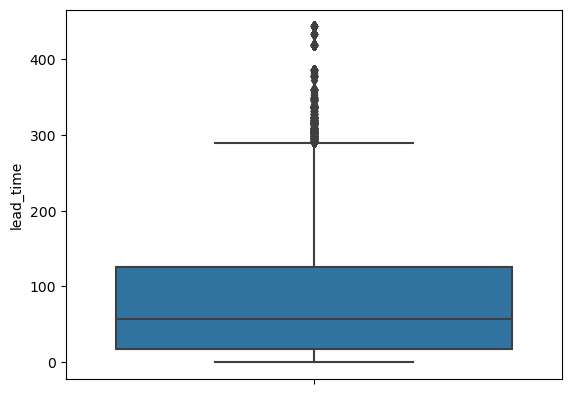

In [143]:
#print(hotel_df["no_of_previous_bookings_not_canceled"].value_counts())
print(hotel_df["no_of_previous_bookings_not_canceled"].nunique())

print(hotel_df["lead_time"].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns 
hotel_df[[ "lead_time","no_of_previous_bookings_not_canceled"]].hist()
plt.show()
sns.boxplot(y=hotel_df["lead_time"])


In [144]:
# remove outliers with z-score for lead_time
upper_limit = hotel_df["lead_time"].mean() + 3* hotel_df["lead_time"].std() # Right from the mean
lower_limit = hotel_df["lead_time"].mean() - 3* hotel_df["lead_time"].std() # Left from the mean
print(upper_limit)
print(lower_limit)

#lower limit is not needed, so use a mask only with upperlimit
mask = hotel_df["lead_time"] > upper_limit
hotel_df = hotel_df[~mask]


343.02500695503045
-172.5598932403509


In [145]:
# remove outliers with z-score for no_of_previous_bookings_not_canceled
upper_limit = hotel_df["no_of_previous_bookings_not_canceled"].mean() + 3* hotel_df["no_of_previous_bookings_not_canceled"].std() # Right from the mean
lower_limit = hotel_df["no_of_previous_bookings_not_canceled"].mean() - 3* hotel_df["no_of_previous_bookings_not_canceled"].std() # Left from the mean
print(upper_limit)
print(lower_limit)
#lower limit is not needed, so use a mask only with upperlimit
mask = hotel_df["no_of_previous_bookings_not_canceled"] > upper_limit
hotel_df = hotel_df[~mask]


5.444806786814107
-5.134770295546941


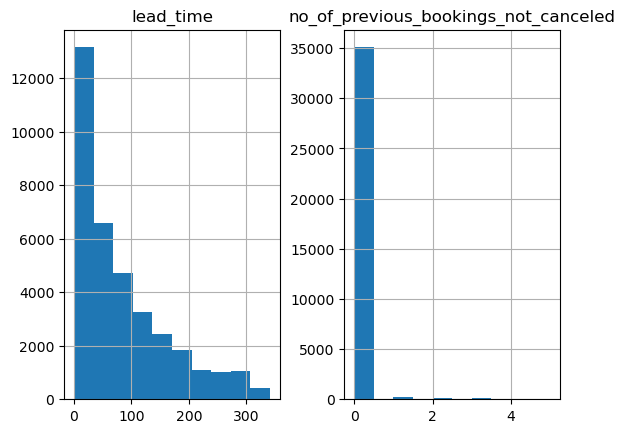

In [146]:
hotel_df[[ "lead_time","no_of_previous_bookings_not_canceled"]].hist()
plt.show()

# Task 2.3
Replace any missing values you find.


In [147]:
print(hotel_df.isna().values.any())
print(hotel_df.isnull().sum())
# there are no missing values

False
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_month                           0
arrival_date                            0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
room_type_Room_Type 1                   0
room_type_Room_Type 2                   0
room_type_Room_Type 3                   0
room_type_Room_Type 4                   0
room_type_Room_Type 5                   0
room_type_Room_Type 6                   0
room_type_Room_Type 7                   0
booking_status_Canceled                 0
booking_status_Not_Canceled             0
repeated_guest_0                        0
repeated_guest_1                        0
dtype: int64


# Task 2.4
Build a logistic regression classification model with ’booking status’ column as the target, and using
all other variables as predictors. Divide the data set into training (70 %) and test set (30 %), use
random state = 0, and follow the process of building a classification model as discussed in the course.

In [179]:
from sklearn.model_selection import train_test_split
prediction_data = hotel_df.copy()
# need to drop one of the booking_status one-hot encoded once so dropped one
prediction_data= prediction_data.drop("booking_status_Canceled", axis=1)
# Define X and y variables
X = prediction_data.drop("booking_status_Not_Canceled", axis=1)
y = prediction_data["booking_status_Not_Canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [180]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(random_state = 0, max_iter=10000,solver="lbfgs")
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [181]:
# Create and print the prediction for train and test set (confusion matrix)
from sklearn import metrics
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)


# Task 2.5 
Create the confusion matrix, calculate classification performance measures. What is the accuracy of
the model on the test set?

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix = confusion_matrix(y_test,y_test_predict)
print(matrix)

report = classification_report(y_test,y_test_predict)
print(report)
accuracy = accuracy_score(y_test, y_test_predict)
print("Accuracy:", accuracy)

[[1832 1658]
 [ 713 6487]]
              precision    recall  f1-score   support

           0       0.72      0.52      0.61      3490
           1       0.80      0.90      0.85      7200

    accuracy                           0.78     10690
   macro avg       0.76      0.71      0.73     10690
weighted avg       0.77      0.78      0.77     10690

Accuracy: 0.7782039289055191


# Task 2.6 
Does the model perform similarly for the two possible categories of the outcome column, i.e. for
hotel visits and cancelations? 

### Answer: no it predicts better if a room is not canceled.

How many false positives do you find, i.e. guests who would visit the
hotel but the model predicts that they would cancel the booking?

### Answer: 713




# Task 3


In [211]:
#import data
iris_df = pd.read_csv("Datasets/iris.csv")
#check for null values
print(iris_df.isna().sum())
iris_df

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Task 3.1
Determine the optimal number of clusters using the elbow method, and perform k-means clustering
with the chosen value (set random state = 0).

In [205]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

iris_clust= iris_df.drop("species",axis=1)
iris_clust= iris_clust.apply(lambda x: preprocessing.scale(x))

sse_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(iris_clust)
    sse_clust.append(kmeans.inertia_)

C:\Users\hekto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


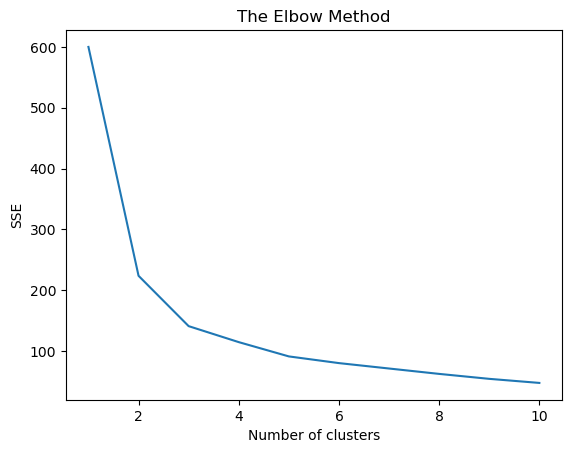

In [206]:
plt.plot(range(1, 11), sse_clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [209]:
# Creating model with the chosen number of clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(iris_clust)


pd.Series(y_clust).value_counts()

0    53
1    50
2    47
dtype: int64

# Task 3.2
What is the average of each variable in each cluster (the original, not the scaled variables)?

In [222]:
print(pd.crosstab(iris_df.species, y_clust))
print(iris_df.groupby(y_clust).mean())
print(iris_df.groupby("species").mean())

col_0             0   1   2
species                    
Iris-setosa       0  50   0
Iris-versicolor  39   0  11
Iris-virginica   14   0  36
   sepal_length  sepal_width  petal_length  petal_width
0      5.801887     2.673585      4.369811     1.413208
1      5.006000     3.418000      1.464000     0.244000
2      6.780851     3.095745      5.510638     1.972340
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


# Task 3.3 
Perform k-means clustering now with k=3 (if this was not your selected k value). When you compare
the resulting clusters with the original ’species’ column, you will find that one of the species is
perfectly identified by clustering (i.e., one of the three clusters contains all the datapoints belonging
to that species, and no datapoints from other species). 
Which one is the correctly identified species?

### Answer: Iris-setosa	

When you look at the mean value of the variables, can you identify which variable(s) ’confuse’ the
clustering model, i.e., which variables you think are responsible for the other two clusters being the
mix of the other two species?

### Answer: Sepal_width


In [212]:
iris_df.groupby(y_clust).mean()

,sepal_length,sepal_width,petal_length,petal_width
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.418000,1.464000,0.244000
2,6.780851,3.095745,5.510638,1.972340
